# Decision tree for regression

Neste caderno, apresentamos como as árvores de decisão estão funcionando na regressão
problemas. Mostramos diferenças com as árvores de decisão apresentadas anteriormente em
uma configuração de classificação.

Primeiro, carregamos o conjunto de dados de pinguins especificamente para resolver uma regressão
problema.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last"> Se você quiser uma visão geral mais detalhada sobre este conjunto de dados, pode consultar o
Apêndice - seção de descrição dos conjuntos de dados no final deste MOOC. </p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]

Para ilustrar como as árvores de decisão estão prevendo em uma configuração de regressão, nós
irá criar um conjunto de dados sintético contendo todos os comprimentos de flipper possíveis de
do mínimo ao máximo dos dados originais.

In [2]:
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min(),
                                   data_train[data_columns[0]].max()),
                         columns=data_columns)

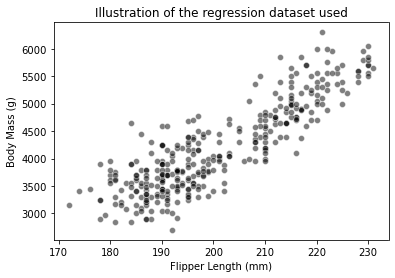

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
_ = plt.title("Illustration of the regression dataset used")

Vamos primeiro ilustrar a diferença entre um modelo linear e uma decisão
árvore.

In [4]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)

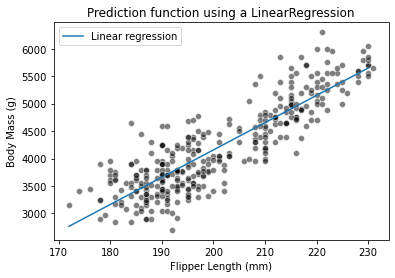

In [5]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Linear regression")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

No gráfico acima, vemos que um `LinearRegression` não regularizado é capaz
para ajustar os dados. Uma característica deste modelo é que todas as novas previsões
estará na linha.

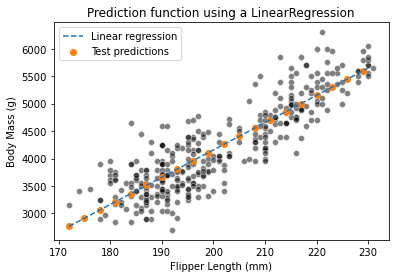

In [6]:
ax = sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                     color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Linear regression",
         linestyle="--")
plt.scatter(data_test[::3], target_predicted[::3], label="Test predictions",
            color="tab:orange")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

Ao contrário dos modelos lineares, as árvores de decisão são modelos não paramétricos:
eles não fazem suposições sobre a maneira como os dados são distribuídos.
Isso afetará o esquema de previsão. Repetindo o experimento acima
irá destacar as diferenças.

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

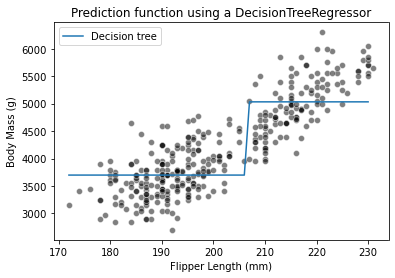

In [8]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

Vemos que o modelo de árvore de decisão não tem uma distribuição * a priori *
para os dados e não acabamos com uma linha reta para regredir flipper
comprimento e massa corporal.

Em vez disso, observamos que as previsões da árvore são constantes por partes.
Na verdade, nosso espaço de recursos foi dividido em duas partições. Vamos verificar o
estrutura em árvore para ver qual foi o limite encontrado durante o treinamento.

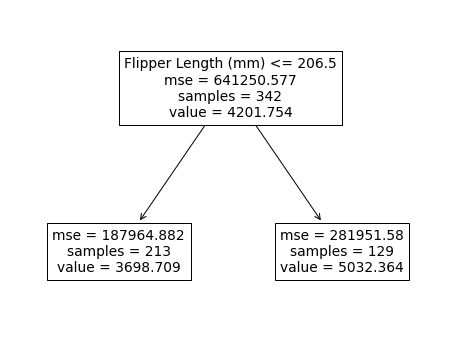

In [9]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=data_columns, ax=ax)

O limite para nosso recurso (comprimento do flipper) é 202,5 ​​mm. O previsto
os valores em cada lado da divisão são duas constantes: 3683,50 ge 5023,62 g.
Esses valores correspondem aos valores médios das amostras de treinamento em cada
partição.

Na classificação, vimos que aumentar a profundidade da árvore nos permitiu
obter limites de decisão mais complexos.
Vamos verificar o efeito de aumentar a profundidade em uma configuração de regressão:

In [11]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

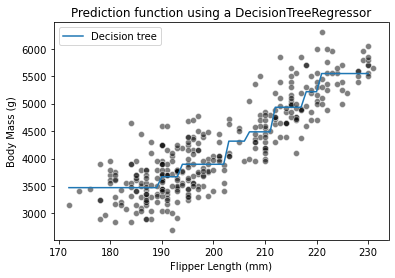

In [12]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

Aumentar a profundidade da árvore aumentará o número de partições e
portanto, o número de valores constantes que a árvore é capaz de prever.

Neste caderno, destacamos as diferenças de comportamento de uma decisão
árvore usada em um problema de classificação em contraste com um problema de regressão.

# 📝 Exercício M5.02

O objetivo deste exercício é descobrir se uma árvore de decisão
modelo é capaz de extrapolar.

Por extrapolação, nos referimos a valores previstos por um modelo fora do
gama de valores de recursos vistos durante o treinamento.

Vamos primeiro carregar os dados de regressão.

In [13]:
import pandas as pd

penguins = pd.read_csv("penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last"> Se você quiser uma visão geral mais detalhada sobre este conjunto de dados, pode consultar o
Apêndice - seção de descrição dos conjuntos de dados no final deste MOOC. </p>
</div>

Primeiro, crie dois modelos, um modelo de regressão linear e uma árvore de decisão
modelo de regressão e ajustá-los aos dados de treinamento. Limite a profundidade em
3 níveis para a árvore de decisão.

In [14]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_regression = LinearRegression()
tree = DecisionTreeRegressor(max_depth=3)

linear_regression.fit(data_train, target_train)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Crie um conjunto de dados de teste, variando do mínimo ao máximo do
comprimento do flipper do conjunto de dados de treinamento. Obtenha as previsões de cada modelo
usando este conjunto de dados de teste.

In [15]:
# solution
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min(),
                                   data_train[data_columns[0]].max()),
                         columns=data_columns)

In [16]:
target_predicted_linear_regression = linear_regression.predict(data_test)
target_predicted_tree = tree.predict(data_test)

Crie um gráfico de dispersão contendo as amostras de treinamento e sobreponha o
previsões de ambos os modelos na parte superior.

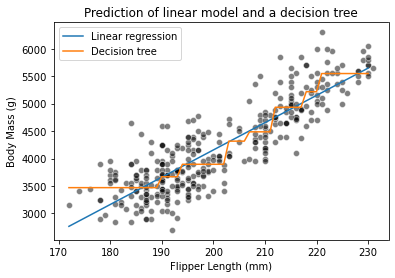

In [18]:
# solution
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted_linear_regression,
         label="Linear regression")
plt.plot(data_test, target_predicted_tree, label="Decision tree")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

Agora, vamos verificar as capacidades de extrapolação de cada modelo. Criar uma
conjunto de dados contendo o valor do conjunto de dados anterior. Além disso, adicione valores
abaixo e acima do mínimo e máximo do comprimento do flipper visto
durante o treinamento.

In [19]:
# solution
offset = 30
data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min() - offset,
                                   data_train[data_columns[0]].max() + offset),
                         columns=data_columns)

Finalmente, faça previsões com ambos os modelos neste novo conjunto de testes. Repetir
a plotagem do exercício anterior.

In [20]:
# solution
target_predicted_linear_regression = linear_regression.predict(data_test)
target_predicted_tree = tree.predict(data_test)

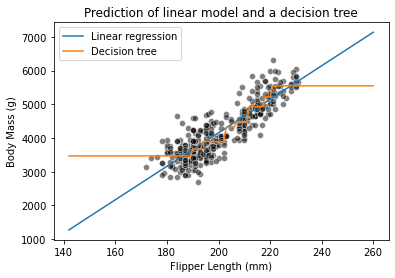

In [21]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted_linear_regression,
         label="Linear regression")
plt.plot(data_test, target_predicted_tree, label="Decision tree")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

O modelo linear extrapolar usando o modelo ajustado para comprimentos de palheta <175 mm e> 235 mm. Na verdade, estamos usando a parametrização do modelo para fazer essas previsões.

Conforme mencionado, as árvores de decisão são modelos não paramétricos e observamos que não podem extrapolar. Para comprimentos de nadadeira abaixo do mínimo, a massa do pinguim nos dados de treinamento com o comprimento de nadadeira mais curto sempre será prevista. Da mesma forma, para comprimentos de nadadeira acima do máximo, a massa do pinguim nos dados de treinamento com a nadadeira mais longa sempre será prevista.